In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.interpolate
import pandas as pd
import time

pi = np.pi
MeV_to_km = 1.323e-6
Mo_to_km = 1.4766

p_c = 4.42e-5 # km^-2

In [2]:
# read in our EOS data
# The files contain n[0.16 fm^-3], p[Mev/fm^-3] and eps [Mev/fm^-3]

EOS_1 = pd.read_table('../data/3952.dat', header=None).to_numpy()
EOS_2 = pd.read_table('../data/8663.dat', header=None).to_numpy()
EOS_3 = pd.read_table('../data/13022.dat', header=None).to_numpy()

# grab p and e then convert them to km^-2

p_1 = MeV_to_km*EOS_1[:,1]
e_1 = MeV_to_km*EOS_1[:,2]

p_2 = MeV_to_km*EOS_2[:,1]
e_2 = MeV_to_km*EOS_2[:,2]

p_3 = MeV_to_km*EOS_3[:,1]
e_3 = MeV_to_km*EOS_3[:,2]

In [3]:
import TOVsolver
max_pressure = 2000 # MeV/fm^3

start = time.time()
MRL_3952 = TOVsolver.solve(EOS_1, max_pressure)
MRL_8663 = TOVsolver.solve(EOS_2, max_pressure)
MRL_13022 = TOVsolver.solve(EOS_3, max_pressure)
print(time.time()-start)

/Users/brendanking/Documents/LANL_project/test_stuff/TOVsolver.py:76: RuntimeWarning: invalid value encountered in sqrt
  num0 = -2 * y[0] * (np.sqrt(y[0]) - 2 * y[1])
/Users/brendanking/Documents/LANL_project/test_stuff/TOVsolver.py:77: RuntimeWarning: invalid value encountered in power
  den0 = (EOS_e(p) + p) * (y[1] + 4 * pi * p * y[0] ** (3 / 2))
/Users/brendanking/Documents/LANL_project/test_stuff/TOVsolver.py:81: RuntimeWarning: invalid value encountered in power
  num1 = -4 * np.pi * EOS_e(p) * (y[0] ** (3 / 2)) * (np.sqrt(y[0]) - 2 * y[1])
/Users/brendanking/Documents/LANL_project/test_stuff/TOVsolver.py:81: RuntimeWarning: invalid value encountered in sqrt
  num1 = -4 * np.pi * EOS_e(p) * (y[0] ** (3 / 2)) * (np.sqrt(y[0]) - 2 * y[1])
/Users/brendanking/Documents/LANL_project/test_stuff/TOVsolver.py:82: RuntimeWarning: invalid value encountered in power
  den1 = (EOS_e(p) + p) * (y[1] + 4 * pi * p * y[0] ** (3 / 2))
/Users/brendanking/Documents/LANL_project/test_stuff/TOVsolve

55.40977692604065


In [4]:
import solver

start = time.time()
R_3952, M_3952 = solver.tov_solve(EOS_1[:,2], EOS_1[:,1])
R_8663, M_8663 = solver.tov_solve(EOS_2[:,2], EOS_2[:,1])
R_13022, M_13022 = solver.tov_solve(EOS_3[:,2], EOS_3[:,1])
print(time.time()-start)

3.1752519607543945


In [5]:
import testsolver

start = time.time()
R_3952_test, M_3952_test, L_3952_test = testsolver.tov_solve(EOS_1[:,2], EOS_1[:,1])
R_8663_test, M_8663_test, L_8663_test = testsolver.tov_solve(EOS_2[:,2], EOS_2[:,1])
R_13022_test, M_13022_test, L_13022_test = testsolver.tov_solve(EOS_3[:,2], EOS_3[:,1])
print(time.time()-start)

38.543182134628296


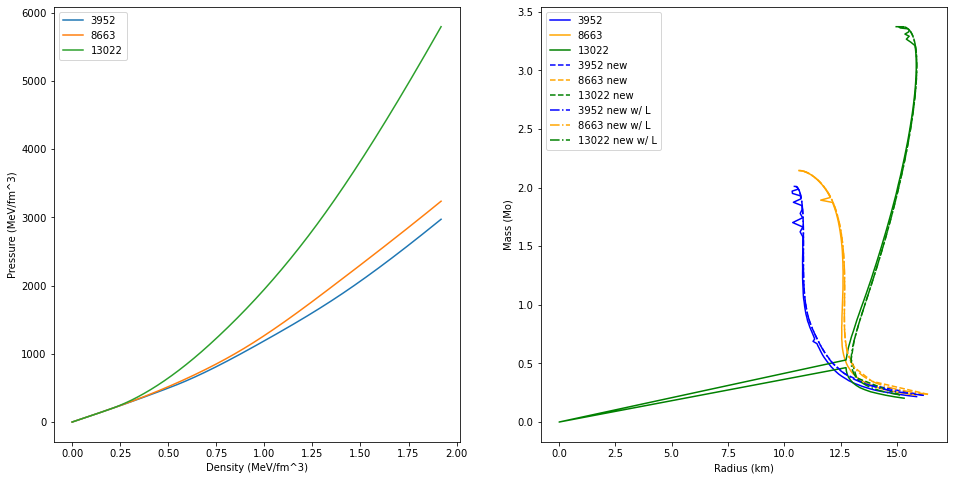

In [6]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].plot(EOS_1[:,0], EOS_1[:,2], label='3952')
ax[0].plot(EOS_2[:,0], EOS_2[:,2], label='8663')
ax[0].plot(EOS_3[:,0], EOS_3[:,2], label='13022')
ax[0].set_xlabel('Density (MeV/fm^3)')
ax[0].set_ylabel('Pressure (MeV/fm^3)')
ax[0].legend()

ax[1].plot(MRL_3952[:,1], MRL_3952[:,0], color='b', ls='-', label='3952')
ax[1].plot(MRL_8663[:,1], MRL_8663[:,0], color='orange', ls='-', label='8663')
ax[1].plot(MRL_13022[:,1], MRL_13022[:,0], color='g', ls='-', label='13022')
ax[1].plot(R_3952, M_3952, color='b', ls='--', label='3952 new')
ax[1].plot(R_8663, M_8663, color='orange', ls='--', label='8663 new')
ax[1].plot(R_13022, M_13022, color='g', ls='--', label='13022 new')
ax[1].plot(R_3952_test, M_3952_test, color='b', ls='-.', label='3952 new w/ L')
ax[1].plot(R_8663_test, M_8663_test, color='orange', ls='-.', label='8663 new w/ L')
ax[1].plot(R_13022_test, M_13022_test,  color='g', ls='-.',label='13022 new w/ L')
ax[1].set_ylabel('Mass (Mo)')
ax[1].set_xlabel('Radius (km)')
ax[1].legend()

The conversion from MeV/fm^3 to km^-2 is taken from "TOV_notes".

$$ 1 \frac{\text{MeV}}{\text{fm}^3} \frac{G}{c^4} = 1.323 \times 10^{-6} \text{ km}^{-2} $$

In [7]:
# let's check my answers with Ingo's

ingo_3952 = pd.read_table('../data/ingo_3952.dat', header=None).to_numpy()
ingo_8663 = pd.read_table('../data/ingo_8663.dat', header=None).to_numpy()
ingo_13022 = pd.read_table('../data/ingo_13022.dat', header=None).to_numpy()

print(ingo_3952.shape) # (radius [km], mass [Mo], Lambda [arb], cental baryon density [idk])

(111, 4)


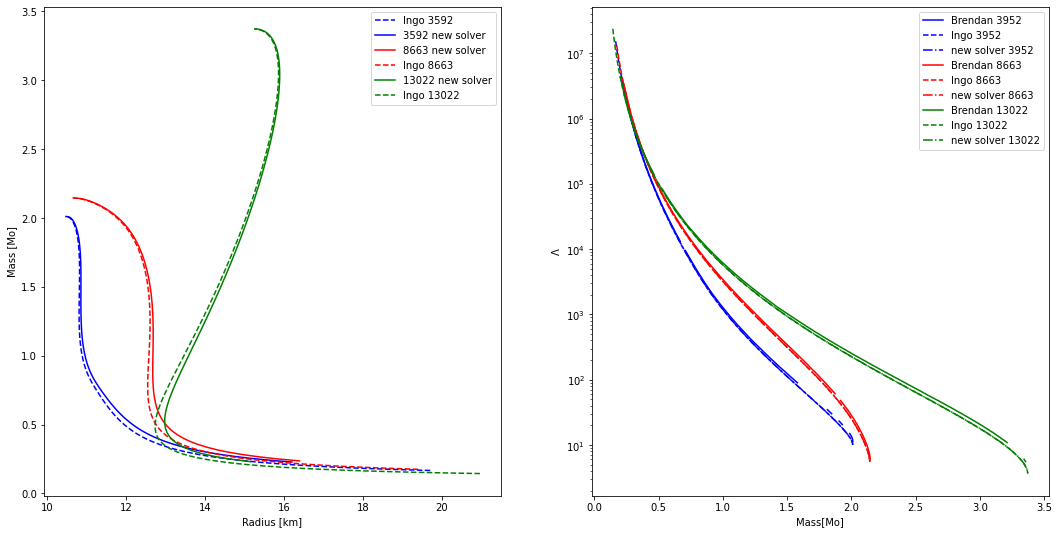

In [8]:
fig, ax = plt.subplots(1,2, figsize=(18,9))

ax[0].plot(ingo_3952[:,0], ingo_3952[:,1], color='b', ls='--', label='Ingo 3592')
ax[0].plot(R_3952_test, M_3952_test, color='b', ls='-', label='3592 new solver')

ax[0].plot(R_8663_test, M_8663_test, color='r', ls='-', label='8663 new solver')
ax[0].plot(ingo_8663[:,0], ingo_8663[:,1], color='r', ls='--', label='Ingo 8663')

ax[0].plot(R_13022_test, M_13022_test, color='g', ls='-', label='13022 new solver')
ax[0].plot(ingo_13022[:,0], ingo_13022[:,1], color='g', ls='--', label='Ingo 13022')

ax[0].set_xlabel('Radius [km]')
ax[0].set_ylabel('Mass [Mo]')
ax[0].legend()

ax[1].plot(MRL_3952[:,0], MRL_3952[:,2], color='b', ls='-', label='Brendan 3952')
ax[1].plot(ingo_3952[:,1], ingo_3952[:,2], color='b', ls='--', label='Ingo 3952')
ax[1].plot(M_3952_test, L_3952_test, color='b', ls='-.', label='new solver 3952')

ax[1].plot(MRL_8663[:,0], MRL_8663[:,2], color='r', ls='-', label='Brendan 8663')
ax[1].plot(ingo_8663[:,1], ingo_8663[:,2], color='r', ls='--', label='Ingo 8663')
ax[1].plot(M_8663_test, L_8663_test, color='r', ls='-.', label='new solver 8663')

ax[1].plot(MRL_13022[:,0], MRL_13022[:,2], color='g', ls='-', label='Brendan 13022')
ax[1].plot(ingo_13022[:,1], ingo_13022[:,2], color='g', ls='--', label='Ingo 13022')
ax[1].plot(M_13022_test, L_13022_test, color='g', ls='-.', label='new solver 13022')


ax[1].set_xlabel('Mass[Mo]')
ax[1].set_ylabel('$\Lambda$')
ax[1].set_yscale('log')
ax[1].legend()